
Speech Emotion Recognition

Librairies 

In [1]:
import os
from IPython.display import Audio
import librosa
import librosa.display as disp
import matplotlib.pyplot as plt
import numpy as np 
import random

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, TimeDistributed, Conv1D, BatchNormalization, Flatten, LSTM, Dropout, Dense

from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model
import pandas as pd

from sklearn.metrics import confusion_matrix
import seaborn as sns 

from keras.layers import Input, TimeDistributed, Conv1D, BatchNormalization, Flatten, LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.models import Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint



Implementation

In [2]:
path="speech-emotion-recognition-ravdess-data\\"


def load_data(path):
    f_emotions=[]
    f_pathes=[]
    folders=os.listdir(path)
    for folder in folders:
        files=os.listdir(path + folder)
        for file in files:
            step=file.split('.')[0]
            step=step.split('-')[2]
            f_emotions.append(int(step))
            f_pathes.append(path + folder + os.sep + file)
    return[f_emotions,f_pathes]


def get_emotion(number):
    info={1: "neutral", 
          2:"calm" , 
          3:"happy" , 
          4:"sad",
          5:"angry",
          6:"fearful",
          7:'disgust',
          8:'surprised'}
    return info[number]

emotions,pathes=load_data(path)




Feature extraction using Librosa

In [3]:
def read_audio(path):
     data,sample_rate=librosa.load(path,duration=2.4,offset=0.6)

     return data,sample_rate

def draw_wave(path,data,sr):
    #data,sr=librosa.load(path)
    plt.title('Audio wave::'+path ,size=17)
    disp.waveshow(data,sr=sr)
    plt.show()
    
def draw_spectogram(path,data,sr):
     #data,sr=librosa.load(path)
     X=librosa.stft(data)
     Xdb=librosa.amplitude_to_db(abs(X))
     plt.title('Spectogram wave::'+path ,size=17)
     disp.specshow(Xdb,sr=sr , x_axis='time' , y_axis= 'log')
     plt.show()

def add_noise(data,sr):
     noise =0.035 * np.random.uniform()*np.amax(data)
     data+= noise * np.random.normal(size=data.shape[0])

     return data,sr
     
def shift(data,sr):
     shift_range = int(np.random.uniform(low=-5,high=5)*1000)
     shifted= np.roll(data,shift_range)

     return shifted,sr


def pitch(data,sr,factor=0.7):
     pitched=librosa.effects.pitch_shift(y=data , sr=sr , n_steps=factor)

     return pitched , sr

def stretch(data,sr ,rate=0.85):
     stretched=librosa.effects.time_stretch(y=data , rate = rate)

     return stretched,sr

###feature extraction MFCCs

def feature_extraction (data,sr):
     mfcc = librosa.feature.mfcc(y=data , sr=sr )
     
     return mfcc

funcs=['Standard',add_noise,pitch]
random.choice(funcs)


def processing_audio(data,sr,options):
     func=random.choice(options)

     if func=='Standard':
          processed= data
     else:
          processed,_=func(data,sr)
     return processed




20
calm


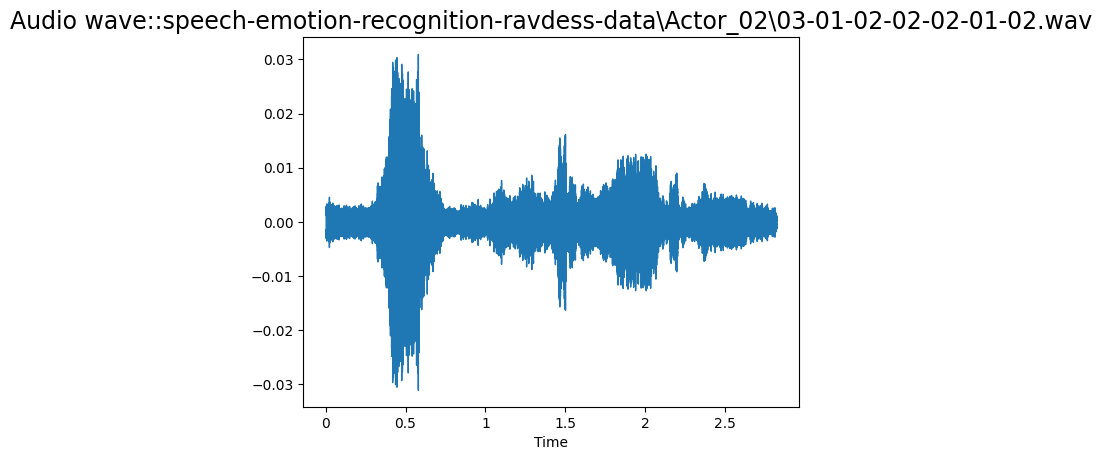

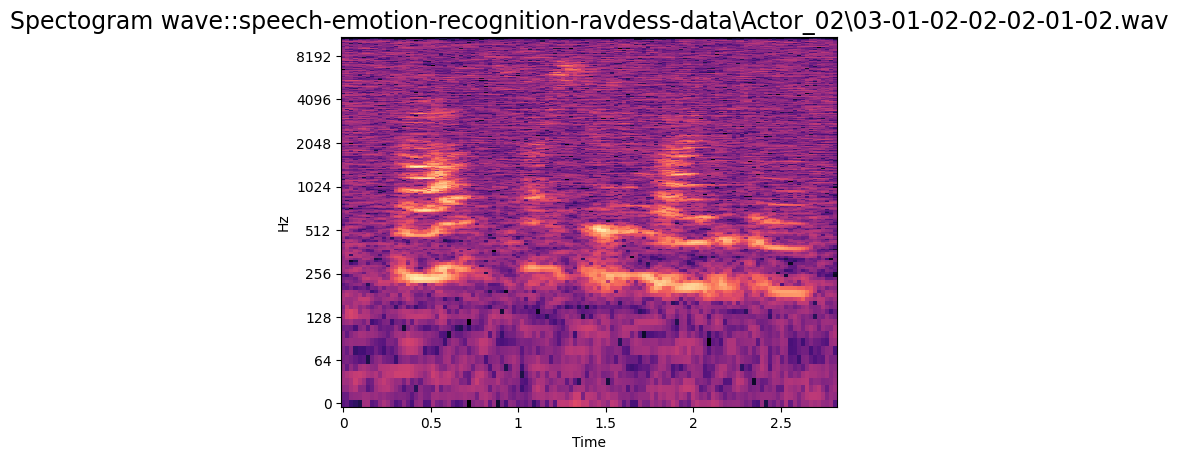

In [4]:
def get_features(path):
    data,sample_rate=read_audio(path)

    funcs=['Standard',add_noise,pitch]

    features=[]

    func1_data = processing_audio(data,sample_rate,funcs)
    func2_data = processing_audio(func1_data,sample_rate,funcs)
    
    feature=feature_extraction(func2_data,sample_rate)
    #print(feature.shape)

    if feature.shape==(20,104):
        features.append(feature)

    func1_data = processing_audio(data,sample_rate,funcs)
    func2_data = processing_audio(func1_data,sample_rate,funcs)

    feature=feature_extraction(func2_data,sample_rate)
    
    if feature.shape==(20,104):
        features.append(feature)
    
    func1_data = processing_audio(data,sample_rate,funcs)
    func2_data = processing_audio(func1_data,sample_rate,funcs)

    feature=feature_extraction(func2_data,sample_rate)
    
    if feature.shape==(20,104):
        features.append(feature)

    return features



def display(number):
    data,sample_rate=read_audio(pathes[number])
    mfcc_features=feature_extraction(data,sample_rate)
    #print(mfcc_features)

    print(len(mfcc_features))

    print(get_emotion(emotions[number]))

    data,sample_rate=add_noise(data,sample_rate)
    data, sample_rate=stretch(data,sample_rate)
    data, sample_rate = shift(data, sample_rate)
    data, sample_rate=pitch(data,sample_rate)

    draw_wave(pathes[number],data , sample_rate)
    draw_spectogram(pathes[number],data,sample_rate)

    return data ,sample_rate



d,sr=display(70)
Audio(data=d,rate=sr)



In [5]:
X=[]
Y=[]

for index in range(len(pathes)):
    value=get_features(pathes[index])
    if value!=[]: 
        for item in value:
            X.append(item)
            Y.append(np.eye(8)[emotions[index]-1])
            
#177 length of the audio 

#20 features ...


In [6]:
for index in range(len(pathes)):
    print(emotions[index])

1
1
1
1
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
1
1
1
1
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
1
1
1
1
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
1
1
1
1
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
1
1
1
1
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
1
1
1
1
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
1
1
1
1
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
1
1
1
1
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
1
1
1
1
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3


In [7]:
#1, n_classes=8

#np.eye(8)[index-1] #0-7

encoder= OneHotEncoder()

encoder.fit_transform(np.array([1,2,3,4,5,6,7,8]).reshape(-1,1)).toarray()

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [8]:
x_train, x_test,y_train, y_test=train_test_split(np.array(X),np.array(Y),test_size=0.2,random_state=11,shuffle=True)
print('train x shape',x_train.shape)
print('test x shape',x_test.shape)
print('test y shape',y_test.shape)
print('train y shape',y_train.shape)

train x shape (3451, 20, 104)
test x shape (863, 20, 104)
test y shape (863, 8)
train y shape (3451, 8)


In [9]:
# Adjust your input data preparation:
trainX = np.expand_dims(x_train, axis=-1)  # Shape will be (batch_size, time_steps, features, 1)
testX = np.expand_dims(x_test, axis=-1)    # Shape will be (batch_size, time_steps, features, 1)
trainX=np.swapaxes(trainX,1,2)
print('trainX',trainX.shape)

testX=np.expand_dims(x_test,axis=3)
testX=np.expand_dims(testX,axis=3)
testX=np.swapaxes(testX,1,2)
print('testX',testX.shape)


inputShape =  trainX.shape[1:]

inputShape

trainX (3451, 104, 20, 1)
testX (863, 104, 20, 1, 1)


(104, 20, 1)

In [11]:
"""def createModel(inputShape):
    model = Sequential()
    
    # Start with an Input layer
    model.add(Input(shape=inputShape))
    
    # Then, define the rest of the model
    model.add(TimeDistributed(Conv1D(32, kernel_size=3, padding='same', activation='relu')))
    model.add(TimeDistributed(BatchNormalization()))
    model.add(TimeDistributed(Flatten()))

    model.add(LSTM(64))
    model.add(Dropout(0.2))

    model.add(Dense(units=64, activation='relu'))       
    model.add(Dropout(0.2))
    model.add(Dense(units=64, activation='relu'))       

    model.add(Dense(units=8, activation='softmax'))       

    return model"""

def create_model(input_shape):
    model = Sequential()
    
    # Input Layer
    model.add(Input(shape=input_shape))
    
    # TimeDistributed Conv1D layers
    model.add(TimeDistributed(Conv1D(32, kernel_size=3, padding='same', activation='relu')))
    model.add(TimeDistributed(BatchNormalization()))
    model.add(TimeDistributed(Flatten()))
    
    # LSTM Layer
    model.add(LSTM(128, return_sequences=False))
    model.add(Dropout(0.3))  # Increase dropout rate to prevent overfitting

    # Dense Layers with Dropout
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(units=64, activation='relu'))
    
    # Output Layer
    model.add(Dense(units=8, activation='softmax'))  # Assuming 8 classes of emotions
    
    return model

# Load data
path = "speech-emotion-recognition-ravdess-data\\"
emotions, pathes = load_data(path)

# Model Compilation and Callbacks
input_shape = (None, 20, 1)  # Adjust based on actual data (e.g., MFCC features)
model = create_model(input_shape)

# Optimizer with lower learning rate
opt = Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])



model = create_model(inputShape)
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed_6              │ (None, 104, 20, 32)    │           128 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_7              │ (None, 104, 20, 32)    │           128 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_8              │ (None, 104, 640)       │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │       393,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 419,272 (1.60 MB)

 Trainable params: 419,208 (1.60 MB)

 Non-trainable params: 64 (256.00 B)

Training the Model

In [12]:
opt=Adam(learning_rate=0.01) 
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

#reduce=ReduceLROnPlateau(monitor='val_loss',factor=0.6,verbose=1,patience=5,min_lr=1e-8)
#stop=EarlyStopping(monitor='val_loss',patience=7)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.0001, verbose=1)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model
hist = model.fit(trainX, y_train, validation_data=(testX, y_test), epochs=80, 
                 batch_size=64, callbacks=[reduce_lr, early_stopping, checkpoint])

#hist=model.fit(trainX,y_train,batch_size=140,epochs=80,validation_data=(testX,y_test),callbacks=[reduce,stop])
n

Epoch 1/80
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1738 - loss: 2.0802
Epoch 1: val_accuracy improved from -inf to 0.29200, saving model to best_model.keras
54/54 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.1741 - loss: 2.0791 - val_accuracy: 0.2920 - val_loss: 1.8954 - learning_rate: 0.0100
Epoch 2/80
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2229 - loss: 1.9009
Epoch 2: val_accuracy improved from 0.29200 to 0.29316, saving model to best_model.keras
54/54 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.2232 - loss: 1.9008 - val_accuracy: 0.2932 - val_loss: 1.8784 - learning_rate: 0.0100
Epoch 3/80
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2808 - loss: 1.8346
Epoch 3: val_accuracy improved from 0.29316 to 0.34299, saving model to best_model.keras
54/54 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.2809 - loss: 1.8342 - val_accuracy: 0.3430 - val_loss: 1.7366 - learning_rate: 0.0100
Epoch 4/80
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3203 -

Testing

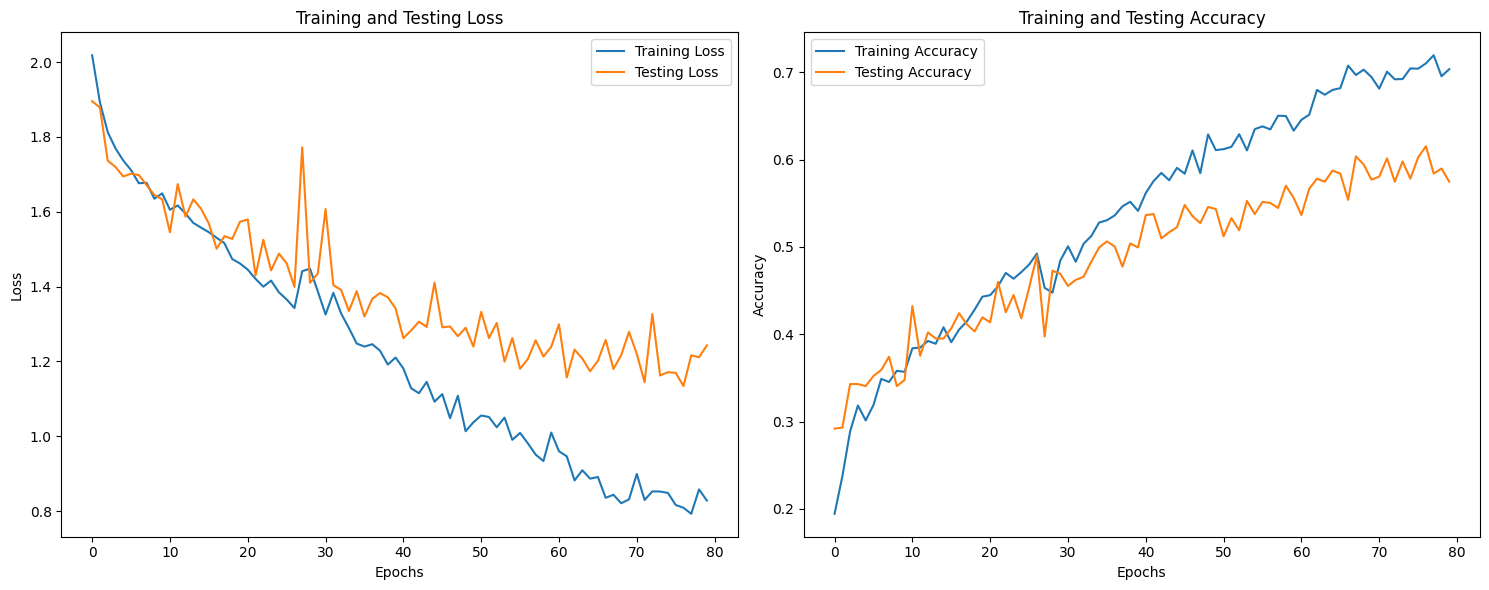

27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.6118 - loss: 1.1257
Test Loss: 1.1341360807418823
Test Accuracy: 61.52954697608948 %


In [13]:
# Assuming you have already run the training and have 'hist' object from model.fit()

# Extract loss and accuracy history
train_loss = hist.history['loss']
test_loss = hist.history['val_loss']

train_accuracy = hist.history['accuracy']
test_accuracy = hist.history['val_accuracy']

# Dynamically determine the number of epochs based on history length
epochs = range(len(train_loss))

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Plot Training and Testing Loss
ax[0].plot(epochs, train_loss, label='Training Loss')
ax[0].plot(epochs, test_loss, label='Testing Loss')
ax[0].set_title('Training and Testing Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

# Plot Training and Testing Accuracy
ax[1].plot(epochs, train_accuracy, label='Training Accuracy')
ax[1].plot(epochs, test_accuracy, label='Testing Accuracy')
ax[1].set_title('Training and Testing Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.tight_layout()
plt.show()
#model.save('C:/Users/21655/Desktop/try/my_model.keras')  # For the native Keras format
test_loss, test_accuracy = model.evaluate(testX, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy * 100, '%')


Testing

In [14]:
emotion_model=load_model('C:/Users/21655/Desktop/try/my_model.keras')
y_pred=emotion_model.predict(testX)

27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 181ms/step


In [16]:
y_pred[0]

array([2.4615874e-04, 6.1252385e-06, 1.5150581e-01, 3.5909224e-02,
       4.6283115e-02, 7.5091243e-02, 1.1687343e-02, 6.7927110e-01],
      dtype=float32)

In [17]:
predY=encoder.inverse_transform(y_pred)
testY=encoder.inverse_transform(y_test)

#get_emotion(predY.flatten()[0])

emotions_predict=[get_emotion(value) for value in predY.flatten()]
emotions_actual=[get_emotion(value) for value in testY.flatten()]

df=pd.DataFrame(columns=['Actual Emotions','Predicted Emotions'])
df['Actual Emotions']=emotions_actual
df['Predicted Emotions']=emotions_predict

df.head(10)


,Actual Emotions,Predicted Emotions
0,surprised,surprised
1,calm,neutral
2,fearful,happy
3,neutral,calm
4,sad,surprised
5,neutral,calm
6,happy,neutral
7,calm,neutral
8,sad,calm
9,sad,sad


Text(120.72222222222221, 0.5, 'Actual  Emotions')

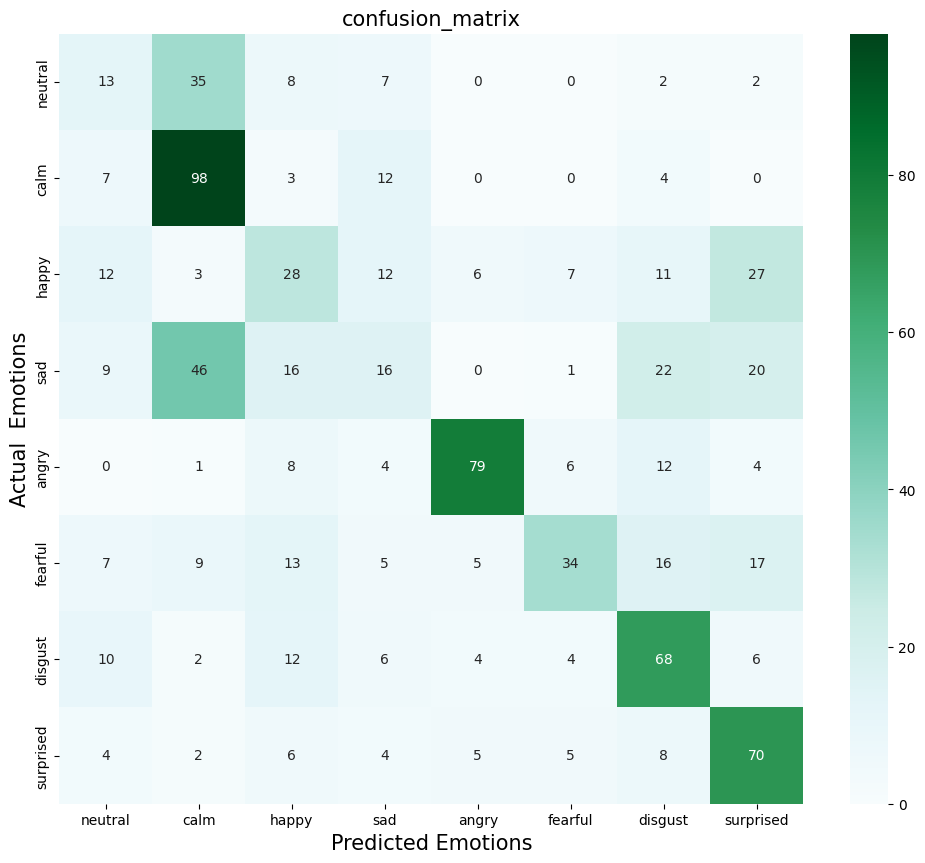

In [18]:
cm=confusion_matrix(testY,predY)
emts=[get_emotion(em) for em in encoder.categories_[0]]

cmt=pd.DataFrame(cm,index=emts,columns=emts)
plt.figure(figsize=(12,10))
sns.heatmap(cmt,annot=True,fmt='',cmap='BuGn')

plt.title('confusion_matrix',size=15)
plt.xlabel('Predicted Emotions',size=15)
plt.ylabel('Actual  Emotions',size=15)